#Load Dataset

In [ ]:
import pandas as pd

# Path lengkap ke file
file_path = '/content/dataset danantara.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
df = df.rename(columns={'full_text': 'text', 'label': 'label'})
df.head()


,text,label
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2
2,Nasib Danantara ke depan jadi tanda tanya besa...,2
3,Ini episode seru. Pandu Syahrir putra Bang Cii...,2
4,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2


#EDA(Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6805 entries, 0 to 6804
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6805 non-null   object
 1   label   6805 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


**Cek Null**

In [ ]:
df.isnull().sum()

,0
text,0
label,0


**Distribusi Label**

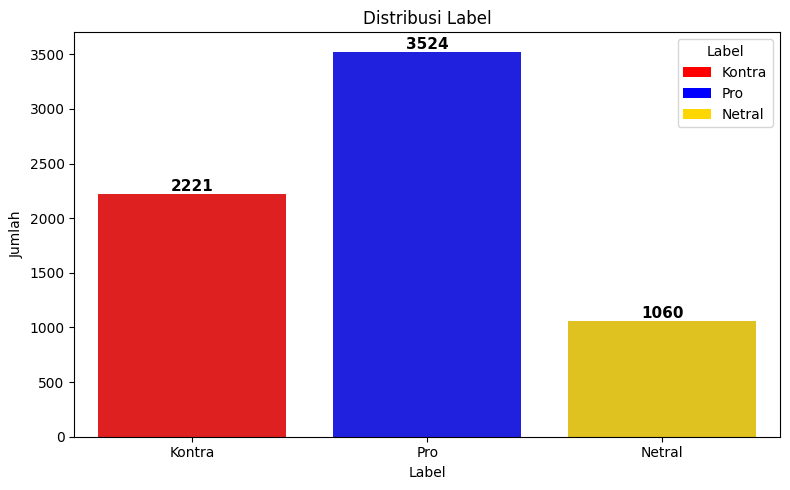

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': df['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Word Cloud**

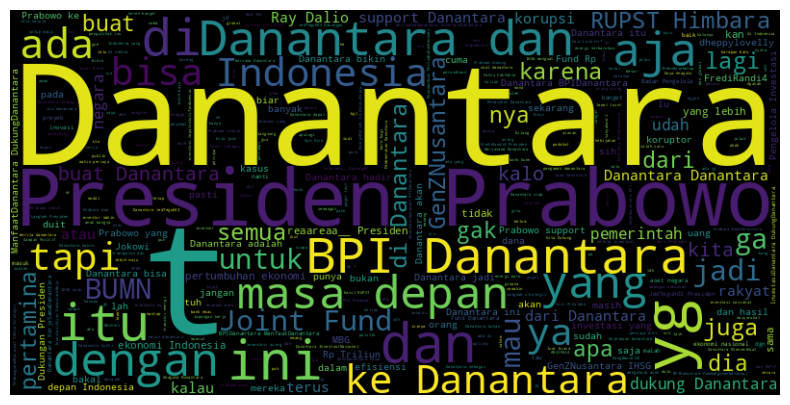

In [ ]:
#Word Cloud sebelum Preprocessing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(df['text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


**Frekuensi Kata**

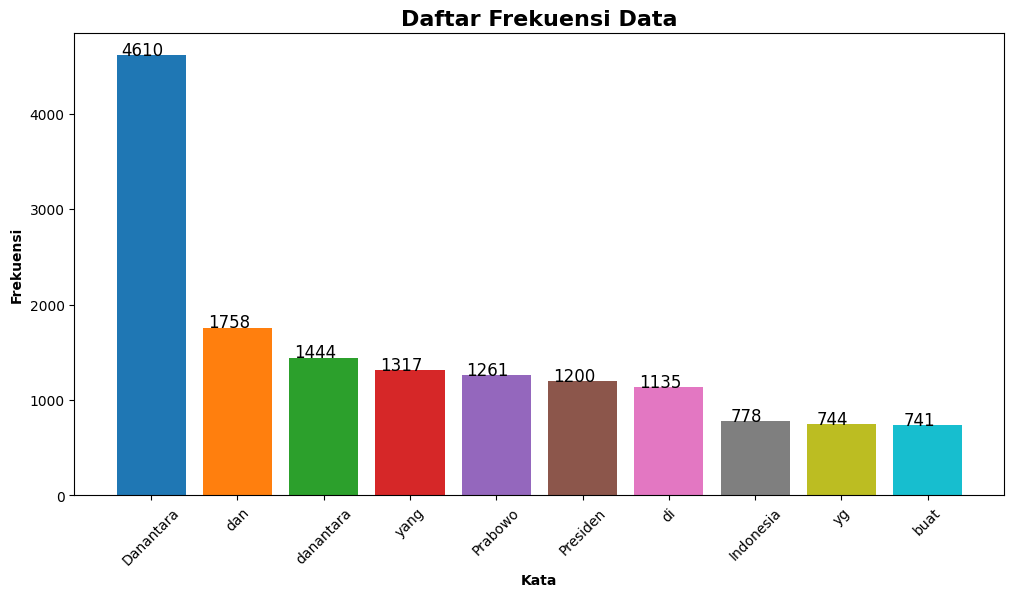

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)

plt.xlabel('Kata', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.title('Daftar Frekuensi Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

for bar,num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12,color='black',ha='center')

plt.show()



**Pola Teks Dataset**

In [ ]:
import pandas as pd
import re
import string
import plotly.express as px

# Fungsi deteksi pola dalam teks
def detect_patterns(text):
    text = str(text)
    return {
        'HTML': bool(re.search(r'<.*?>', text)),
        'URL': bool(re.search(r'https?://\S+|www\.\S+', text)),
        'Mention': bool(re.search(r'@\w+', text)),
        'Hashtag': bool(re.search(r'#\w+', text)),
        'HTML Entity': bool(re.search(r'&\w+;', text)),
        'Emoji': bool(re.search(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002700-\U000027BF"
            u"\U000024C2-\U0001F251"
            "]+", text)),
        'Non-ASCII': any(ord(c) > 127 for c in text),
        'Punctuation': any(c in string.punctuation for c in text),
        'Extra Whitespace': bool(re.search(r'\s{2,}', text)),
    }

# Terapkan fungsi pada kolom teks
pattern_flags = df['text'].apply(detect_patterns)
pattern_df = pd.DataFrame(pattern_flags.tolist())

# Hitung jumlah kemunculan setiap pola
pattern_counts = pattern_df.sum().sort_values(ascending=False)
eda_summary = pd.DataFrame({'Jumlah Tweet': pattern_counts})

# Buat grafik batang
fig = px.bar(
    eda_summary,
    x=eda_summary.index,
    y='Jumlah Tweet',
    title='📌 Jumlah Tweet yang Mengandung Pola Tertentu',
    labels={'x': 'Jenis Pola', 'Jumlah Tweet': 'Jumlah'},
    color='Jumlah Tweet',
    color_continuous_scale='Viridis'
)

fig.update_traces(text=eda_summary['Jumlah Tweet'], textposition='outside')

fig.update_layout(
    width=900,
    height=500,
    xaxis_tickangle=-30,
    xaxis_title='Jenis Pola',
    yaxis_title='Jumlah Tweet',
    margin=dict(l=50, r=50, t=80, b=100)
)

fig.show()


#SVM 3 Label Tanpa Under Sampling

##Preprocessing

In [ ]:
label3_svm = df[~df['label'].isin([3])].copy()

**Text Cleaning**

In [ ]:
import re
import string

def clean_text_twitter(text):
    text = str(text)

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Hapus mention
    text = re.sub(r'@\w+', '', text)

    # Hapus hanya tanda pagar (#) dari hashtag, tapi simpan katanya
    text = re.sub(r'#', '', text)

    # Ganti &amp dan HTML entities
    text = re.sub(r'&amp;', 'dan', text)
    text = re.sub(r'&\w+;', '', text)

    # Hapus emoji dan simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002700-\U000027BF"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    # Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Terapkan pada kolom
label3_svm['cleaning_data'] = label3_svm['text'].apply(clean_text_twitter)

label3_svm.head()

,text,label,cleaning_data
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...


**Case Folding**

In [ ]:
def case_folding(text):
  if isinstance(text,str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
label3_svm['case_folding'] = label3_svm['cleaning_data'].apply(case_folding)
label3_svm.head(10)

,text,label,cleaning_data,case_folding
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...
6,Wekekekekeke Masih penasasaran bagaimana #Dana...,0,Wekekekekeke Masih penasasaran bagaimana Danan...,wekekekekeke masih penasasaran bagaimana danan...
7,Danantara menghadapi jalan terjal! Mampukah me...,2,Danantara menghadapi jalan terjal Mampukah men...,danantara menghadapi jalan terjal mampukah men...
8,Apapun institusi (BKPM LPI menyusul Danantara)...,0,Apapun institusi BKPM LPI menyusul Danantara i...,apapun institusi bkpm lpi menyusul danantara i...
9,Danantara sebagai motor penggerak investasi as...,2,Danantara sebagai motor penggerak investasi as...,danantara sebagai motor penggerak investasi as...
10,Antara DANANTARA vs RUU PERAMPASAN ASET dan RE...,2,Antara DANANTARA vs RUU PERAMPASAN ASET dan RE...,antara danantara vs ruu perampasan aset dan re...


**Tokenization**

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens
label3_svm['tokenize'] = label3_svm['case_folding'].apply(tokenize)
label3_svm.head()

,text,label,cleaning_data,case_folding,tokenize
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban..."
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan..."
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan..."
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba..."
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan..."


**Stopword Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))


def remove_stopwords(text):
  return[word for word in text if word not in stop_words]

label3_svm['remove_stopwords'] = label3_svm['tokenize'].apply(lambda x: remove_stopwords(x))
label3_svm.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,cleaning_data,case_folding,tokenize,remove_stopwords
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban...","[hebat, nkri, gaya, mafioso, bank, membantu, k..."
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan...","[hashim, kasih, bocoran, duit, danantara, dipa..."
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan...","[nasib, danantara, tanda, peluang, tantangan, ..."
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba...","[episode, seru, pandu, syahrir, putra, bang, c..."
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan...","[rosan, roeslani, peluncuran, bp, danantara, t..."


**Stemming**

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_text(text):
    return [stemmer.stem(word) for word in text]

label3_svm['stemming'] = label3_svm['remove_stopwords'].apply(lambda x: ' '.join(stemming_text(x)))

label3_svm.head()

,text,label,cleaning_data,case_folding,tokenize,remove_stopwords,stemming
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban...","[hebat, nkri, gaya, mafioso, bank, membantu, k...",hebat nkri gaya mafioso bank bantu hasil progr...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan...","[hashim, kasih, bocoran, duit, danantara, dipa...",hashim kasih bocor duit danantara pakai
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan...","[nasib, danantara, tanda, peluang, tantangan, ...",nasib danantara tanda peluang tantang ekonomi ...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba...","[episode, seru, pandu, syahrir, putra, bang, c...",episode seru pandu syahrir putra bang ciil alm...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan...","[rosan, roeslani, peluncuran, bp, danantara, t...",ros roeslani luncur bp danantara laksana febru...


In [ ]:
label3_svm = label3_svm.drop_duplicates(subset='stemming', keep='first')

In [ ]:
label3_svm = label3_svm.dropna()

**Distribusi Label setelah Preprocessing**

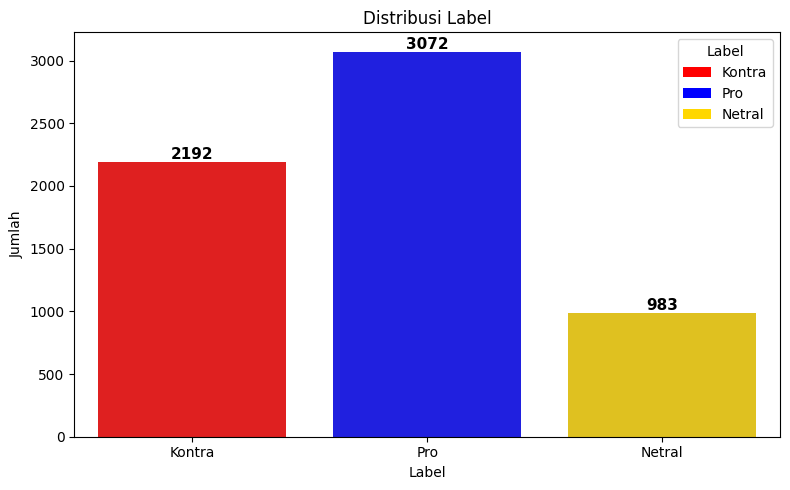

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_svm['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


##Split Dataset menjadi 70% Training, 15% Validasi, dan 15% Testing Tanpa Under Sampling



**Split Dataset menjadi 70% Training, 15% Validasi, dan 15% Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Split 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    label3_svm['stemming'],
    label3_svm['label'],
    test_size=0.30,
    stratify=label3_svm['label'],
    random_state=42
)

# Split 30% temp jadi 15% val dan 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

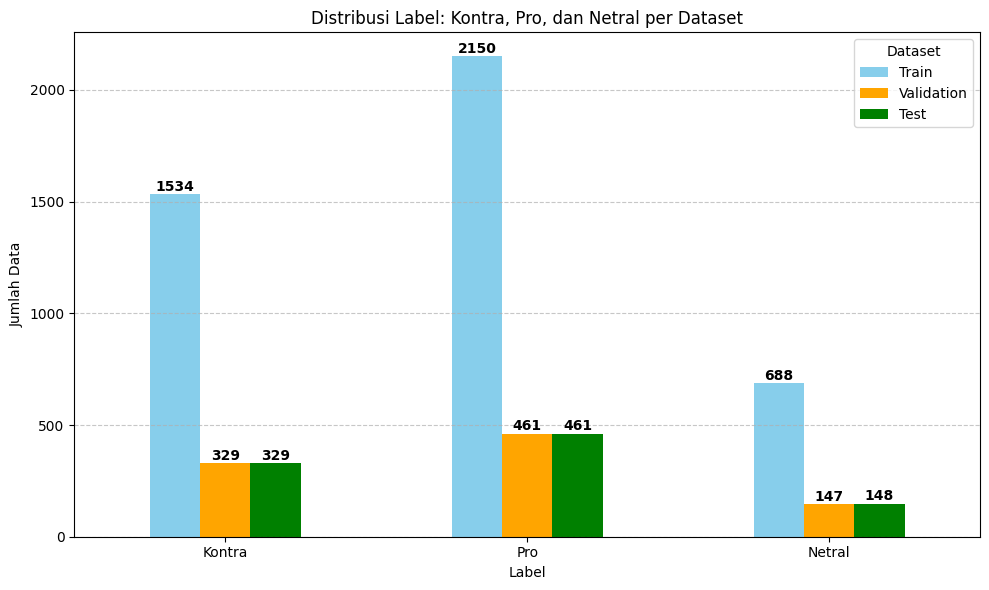

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah label di setiap set
train_counts = y_train.value_counts().sort_index()
val_counts = y_val.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Gabungkan ke DataFrame
df_counts = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
})

# Mapping angka ke label teks
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}
df_counts.index = df_counts.index.map(label_map)

# Plot
ax = df_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])

# Tambahkan jumlah di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 1,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

# Tambahkan judul dan label sumbu
plt.title("Distribusi Label: Kontra, Pro, dan Netral per Dataset")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


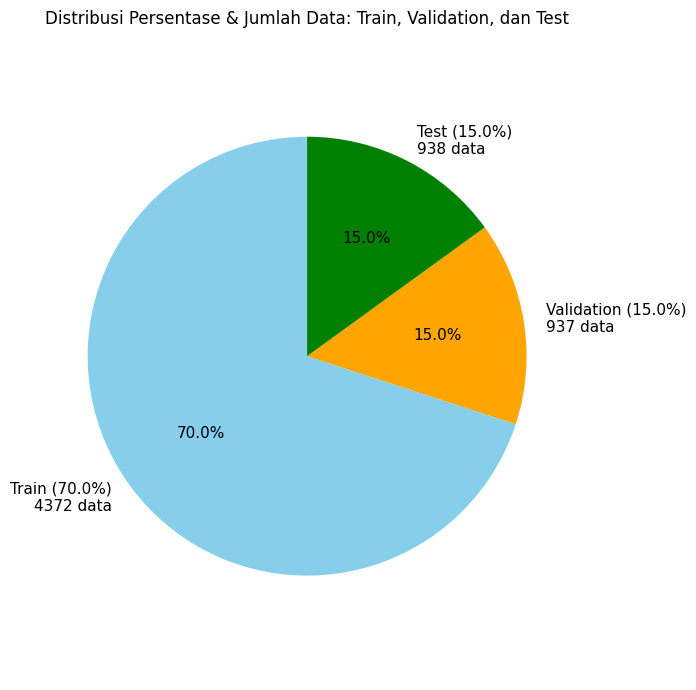

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data di setiap subset
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)

# Total data
total_size = train_size + val_size + test_size

# Hitung persentase
train_pct = train_size / total_size * 100
val_pct = val_size / total_size * 100
test_pct = test_size / total_size * 100

# Buat pie chart
sizes = [train_pct, val_pct, test_pct]
counts = [train_size, val_size, test_size]
labels = [
    f'Train ({train_pct:.1f}%)\n{train_size} data',
    f'Validation ({val_pct:.1f}%)\n{val_size} data',
    f'Test ({test_pct:.1f}%)\n{test_size} data'
]
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops=dict(color="black", fontsize=11)
)

plt.title('Distribusi Persentase & Jumlah Data: Train, Validation, dan Test')
plt.axis('equal')  # Agar bentuk lingkaran simetris
plt.tight_layout()
plt.show()


##Fitur Ekstraksi TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##Training dan Evaluasi SVM 70% Training, 15% Validasi, dan 15% Testing Tanpa Under Sampling

**Training**

In [ ]:
from sklearn.svm import SVC

# Inisialisasi dan latih model dengan kernel RBF
svm_3_label = SVC(kernel='rbf', probability=True)  # probability=True diperlukan untuk ROC AUC
svm_3_label.fit(X_train_tfidf, y_train)



SVC(probability=True)

**Validasi**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Prediksi validasi
y_val_pred = svm_3_label.predict(X_val_tfidf)

print("=== Validation Metrics ===")
print("Accuracy : {:.4f}".format(accuracy_score(y_val, y_val_pred)))
print("F1 Score : {:.4f}".format(f1_score(y_val, y_val_pred, average='macro')))
print("Precision: {:.4f}".format(precision_score(y_val, y_val_pred, average='macro')))
print("Recall   : {:.4f}".format(recall_score(y_val, y_val_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

=== Validation Metrics ===
Accuracy : 0.8196
F1 Score : 0.7058
Precision: 0.7739
Recall   : 0.7058

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       329
           1       0.95      0.91      0.93       461
           2       0.66      0.27      0.38       147

    accuracy                           0.82       937
   macro avg       0.77      0.71      0.71       937
weighted avg       0.82      0.82      0.80       937



**Testing**

In [ ]:
y_test_pred = svm_3_label.predict(X_test_tfidf)

print("=== Test Metrics ===")
print("Accuracy : {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print("F1 Score : {:.4f}".format(f1_score(y_test, y_test_pred, average='macro')))
print("Precision: {:.4f}".format(precision_score(y_test, y_test_pred, average='macro')))
print("Recall   : {:.4f}".format(recall_score(y_test, y_test_pred, average='macro')))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



=== Test Metrics ===
Accuracy : 0.8198
F1 Score : 0.7072
Precision: 0.8235
Recall   : 0.7052

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.95      0.80       329
           1       0.95      0.90      0.93       461
           2       0.83      0.26      0.39       148

    accuracy                           0.82       938
   macro avg       0.82      0.71      0.71       938
weighted avg       0.84      0.82      0.80       938



**Confusion Matrix**

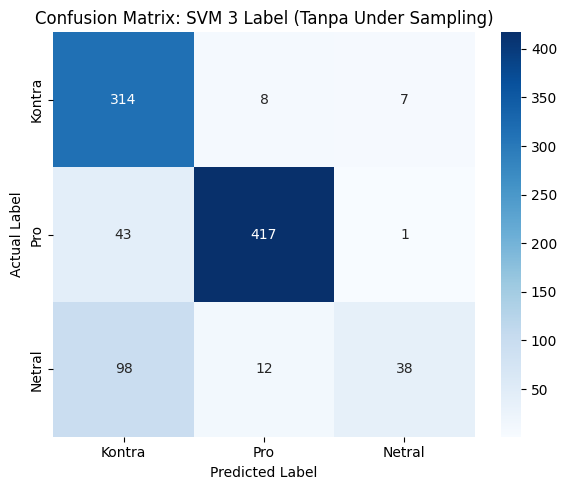

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prediksi
y_test_pred = svm_3_label.predict(X_test_tfidf)

# Buat confusion matrix dengan urutan label sesuai: 0 = Kontra, 1 = Pro, 2 = Netral
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Kontra", "Pro", "Netral"],
            yticklabels=["Kontra", "Pro", "Netral"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix: SVM 3 Label (Tanpa Under Sampling)")
plt.tight_layout()
plt.show()

**ROC AUC**

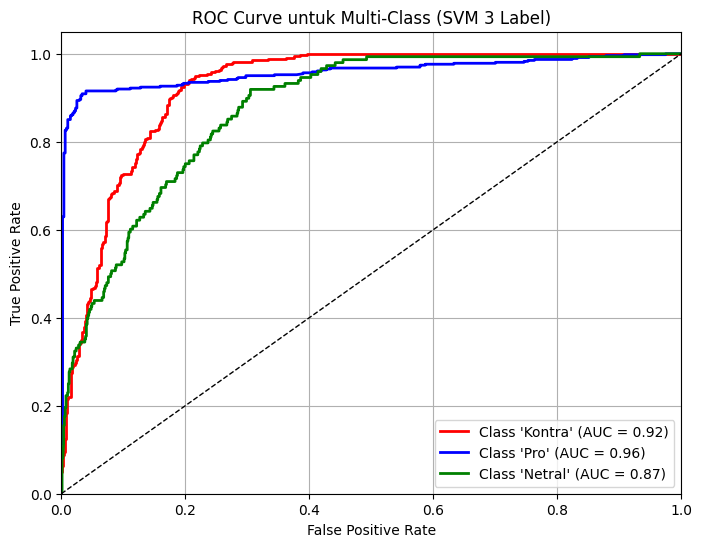


🎯 ROC AUC (macro): 0.9184


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ==============================
# Binarisasi label
# ==============================
# Misal label: [pro, kontra, netral] → encode sebagai 0, 1, 2
classes = sorted(label3_svm['label'].unique())  # urutan kelas alfabet
y_test_bin = label_binarize(y_test, classes=classes)
y_score = svm_3_label.predict_proba(X_test_tfidf)

# ==============================
# ROC Curve dan AUC per kelas
# ==============================
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ==============================
# Hitung Macro AUC
# ==============================
macro_roc_auc = np.mean(list(roc_auc.values()))

# ==============================
# Plot ROC Curve
# ==============================
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i, color in zip(range(n_classes), colors):
    if i == 0:
        label_name = 'Kontra'
    elif i == 1:
        label_name = 'Pro'
    elif i == 2:
        label_name = 'Netral'

    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class \'{label_name}\' (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class (SVM 3 Label)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"\n🎯 ROC AUC (macro): {macro_roc_auc:.4f}")


**Simpan Hasil Prediksi**

In [ ]:
import pandas as pd

# Reset index agar sejajar
y_test = y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Buat Series dari hasil prediksi
y_test_pred_series = pd.Series(y_test_pred, index=y_test.index)

# Ambil kembali teks asli dan hasil stemming
original_texts = []
stemming_texts = []

for text in X_test:
    match = label3_svm[label3_svm['stemming'] == text]
    if not match.empty:
        original_texts.append(match.iloc[0]['text'])
        stemming_texts.append(match.iloc[0]['stemming'])
    else:
        original_texts.append("")
        stemming_texts.append(text)

# Susun DataFrame hasil
result_df = pd.DataFrame({
    'Text': original_texts,
    'Stemming': stemming_texts,
    'True Label': y_test,
    'Predicted Label': y_test_pred_series
})

# Tambahkan kolom Correct (True jika benar, False jika salah)
result_df['Correct'] = result_df['True Label'] == result_df['Predicted Label']

# Urutkan: salah prediksi di atas (Correct = False)
result_df = result_df.sort_values(by='Correct', ascending=True).reset_index(drop=True)

# Simpan ke file CSV
result_df.to_csv('hasil_prediksi_label3_svm_danantara.csv', index=False)


#SVM 3 Label Dengan Under Sampling

##Preprocessing

In [ ]:
label3_svm_undersampling = df[~df['label'].isin([3])].copy()

**Text Cleaning**

In [ ]:
import re
import string

def clean_text_twitter(text):
    text = str(text)

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Hapus mention
    text = re.sub(r'@\w+', '', text)

    # Hapus hashtag
    text = re.sub(r'#\w+', '', text)

    # Ganti &amp dan HTML entities
    text = re.sub(r'&amp;', 'dan', text)
    text = re.sub(r'&\w+;', '', text)

    # Hapus emoji dan simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emotikon wajah
        u"\U0001F300-\U0001F5FF"  # simbol & pictograph
        u"\U0001F680-\U0001F6FF"  # transportasi & simbol
        u"\U0001F1E0-\U0001F1FF"  # bendera
        u"\U00002700-\U000027BF"  # simbol tambahan
        u"\U000024C2-\U0001F251"  # lain-lain
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    # Hapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Terapkan pada kolom
label3_svm_undersampling['cleaning_data'] = label3_svm_undersampling['text'].apply(clean_text_twitter)

label3_svm_undersampling.head()

,text,label,cleaning_data
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...


**Case Folding**

In [ ]:
def case_folding(text):
  if isinstance(text,str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
label3_svm_undersampling['case_folding'] = label3_svm_undersampling['cleaning_data'].apply(case_folding)
label3_svm_undersampling.head(10)

,text,label,cleaning_data,case_folding
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...
6,Wekekekekeke Masih penasasaran bagaimana #Dana...,0,Wekekekekeke Masih penasasaran bagaimana nanti...,wekekekekeke masih penasasaran bagaimana nanti...
7,Danantara menghadapi jalan terjal! Mampukah me...,2,Danantara menghadapi jalan terjal Mampukah men...,danantara menghadapi jalan terjal mampukah men...
8,Apapun institusi (BKPM LPI menyusul Danantara)...,0,Apapun institusi BKPM LPI menyusul Danantara i...,apapun institusi bkpm lpi menyusul danantara i...
9,Danantara sebagai motor penggerak investasi as...,2,Danantara sebagai motor penggerak investasi as...,danantara sebagai motor penggerak investasi as...
10,Antara DANANTARA vs RUU PERAMPASAN ASET dan RE...,2,Antara DANANTARA vs RUU PERAMPASAN ASET dan RE...,antara danantara vs ruu perampasan aset dan re...


**Tokenization**

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens
label3_svm_undersampling['tokenize'] = label3_svm_undersampling['case_folding'].apply(tokenize)
label3_svm_undersampling.head()

,text,label,cleaning_data,case_folding,tokenize
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban..."
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan..."
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan..."
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba..."
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan..."


**Stopword Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))


def remove_stopwords(text):
  return[word for word in text if word not in stop_words]

label3_svm_undersampling['remove_stopwords'] = label3_svm_undersampling['tokenize'].apply(lambda x: remove_stopwords(x))
label3_svm_undersampling.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,cleaning_data,case_folding,tokenize,remove_stopwords
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban...","[hebat, nkri, gaya, mafioso, bank, membantu, k..."
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan...","[hashim, kasih, bocoran, duit, danantara, dipa..."
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan...","[nasib, danantara, tanda, peluang, tantangan, ..."
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba...","[episode, seru, pandu, syahrir, putra, bang, c..."
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan...","[rosan, roeslani, peluncuran, bp, danantara, t..."


**Stemming**

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_text(text):
    return [stemmer.stem(word) for word in text]

label3_svm_undersampling['stemming'] = label3_svm_undersampling['remove_stopwords'].apply(lambda x: ' '.join(stemming_text(x)))

label3_svm_undersampling.head()

,text,label,cleaning_data,case_folding,tokenize,remove_stopwords,stemming
0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,0,Hebat NKRI gaya mafioso Apabila ada bank yang ...,hebat nkri gaya mafioso apabila ada bank yang ...,"[hebat, nkri, gaya, mafioso, apabila, ada, ban...","[hebat, nkri, gaya, mafioso, bank, membantu, k...",hebat nkri gaya mafioso bank bantu hasil progr...
1,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,2,Hashim Kasih Bocoran Duit Danantara Akan Dipak...,hashim kasih bocoran duit danantara akan dipak...,"[hashim, kasih, bocoran, duit, danantara, akan...","[hashim, kasih, bocoran, duit, danantara, dipa...",hashim kasih bocor duit danantara pakai
2,Nasib Danantara ke depan jadi tanda tanya besa...,2,Nasib Danantara ke depan jadi tanda tanya besa...,nasib danantara ke depan jadi tanda tanya besa...,"[nasib, danantara, ke, depan, jadi, tanda, tan...","[nasib, danantara, tanda, peluang, tantangan, ...",nasib danantara tanda peluang tantang ekonomi ...
4,Ini episode seru. Pandu Syahrir putra Bang Cii...,2,Ini episode seru Pandu Syahrir putra Bang Ciil...,ini episode seru pandu syahrir putra bang ciil...,"[ini, episode, seru, pandu, syahrir, putra, ba...","[episode, seru, pandu, syahrir, putra, bang, c...",episode seru pandu syahrir putra bang ciil alm...
5,Rosan Roeslani Yakin Peluncuran BP Danantara B...,2,Rosan Roeslani Yakin Peluncuran BP Danantara B...,rosan roeslani yakin peluncuran bp danantara b...,"[rosan, roeslani, yakin, peluncuran, bp, danan...","[rosan, roeslani, peluncuran, bp, danantara, t...",ros roeslani luncur bp danantara laksana febru...


In [ ]:
label3_svm_undersampling = label3_svm_undersampling.drop_duplicates(subset='stemming', keep='first')

In [ ]:
label3_svm_undersampling = label3_svm_undersampling.dropna()

**Distribusi Label setelah Preprocessing**

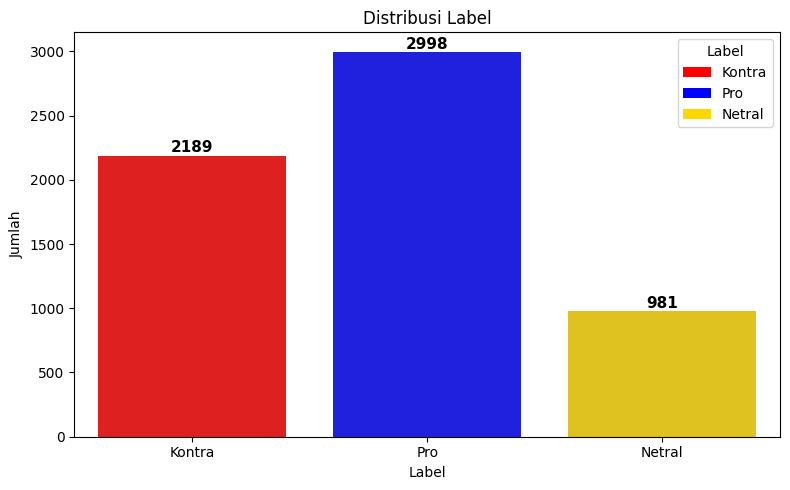

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_svm_undersampling['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


##Split Dataset menjadi 70% Training, 15% Validasi, dan 15% Testing Tanpa Under Sampling



**Distribusi Label Sebelum UnderSampling**

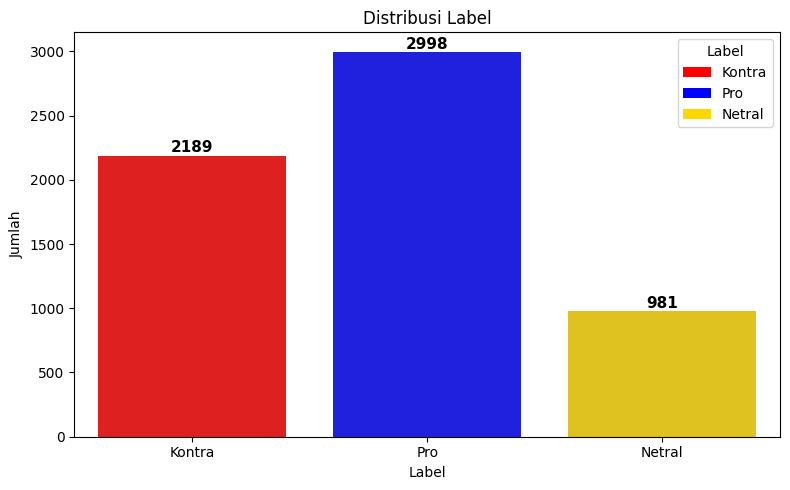

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_svm_undersampling['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Under Sampling**

In [ ]:
# Pisahkan masing-masing kelas
df_kontra = label3_svm_undersampling[label3_svm_undersampling['label'] == 0]
df_pro = label3_svm_undersampling[label3_svm_undersampling['label'] == 1]
df_netral = label3_svm_undersampling[label3_svm_undersampling['label'] == 2]

# Tentukan ukuran minimum (kelas minoritas)
min_size = min(len(df_kontra), len(df_pro), len(df_netral))

# Undersampling kedua kelas ke ukuran yang sama
df_kontra_balanced = df_kontra.sample(n=min_size, random_state=42)
df_pro_balanced = df_pro.sample(n=min_size, random_state=42)
df_netral_balanced = df_netral.sample(n=min_size, random_state=42)

# Gabungkan kembali
label3_svm_undersampling = pd.concat([df_kontra_balanced, df_pro_balanced, df_netral_balanced]).sample(frac=1, random_state=42).reset_index(drop=True)

**Distribusi Label Sesudah UnderSampling**

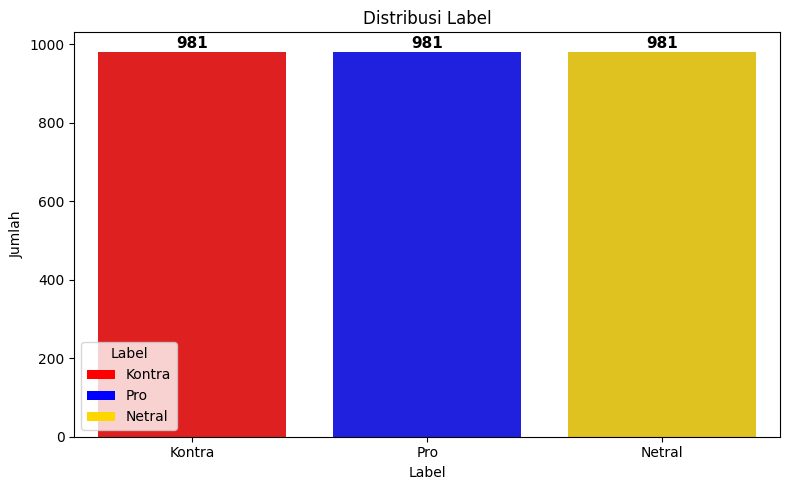

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Peta label numerik ke string
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}

# Ambil label dari df → simpan ke distribusi
distribusi = pd.DataFrame({'label': label3_svm_undersampling['label']})

# Tambahkan kolom label_str hasil pemetaan
distribusi['label_str'] = distribusi['label'].map(label_map)

# Hitung distribusi label
label_counts = distribusi['label_str'].value_counts().reindex(['Kontra', 'Pro', 'Netral'])

# Palet warna: merah, biru, kuning
custom_palette = {'Kontra': 'red', 'Pro': 'blue', 'Netral': 'gold'}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    hue=label_counts.index,
    palette=custom_palette,
    dodge=False
)

# Tambahkan jumlah di atas tiap batang
for i, (label, count) in enumerate(label_counts.items()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Legenda manual
legend_elements = [
    Patch(facecolor='red', label='Kontra'),
    Patch(facecolor='blue', label='Pro'),
    Patch(facecolor='gold', label='Netral')
]
plt.legend(handles=legend_elements, title='Label')

# Keterangan
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


**Split Dataset menjadi 70% Training, 15% Validasi, dan 15% Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Split 70% train, 30% temp (val + test)
X_train_under, X_temp_under, y_train_under, y_temp_under = train_test_split(
    label3_svm_undersampling['stemming'],
    label3_svm_undersampling['label'],
    test_size=0.30,
    stratify=label3_svm_undersampling['label'],
    random_state=42
)

# Split 30% temp jadi 15% val dan 15% test
X_val_under, X_test_under, y_val_under, y_test_under = train_test_split(
    X_temp_under,
    y_temp_under,
    test_size=0.5,
    stratify=y_temp_under,
    random_state=42
)


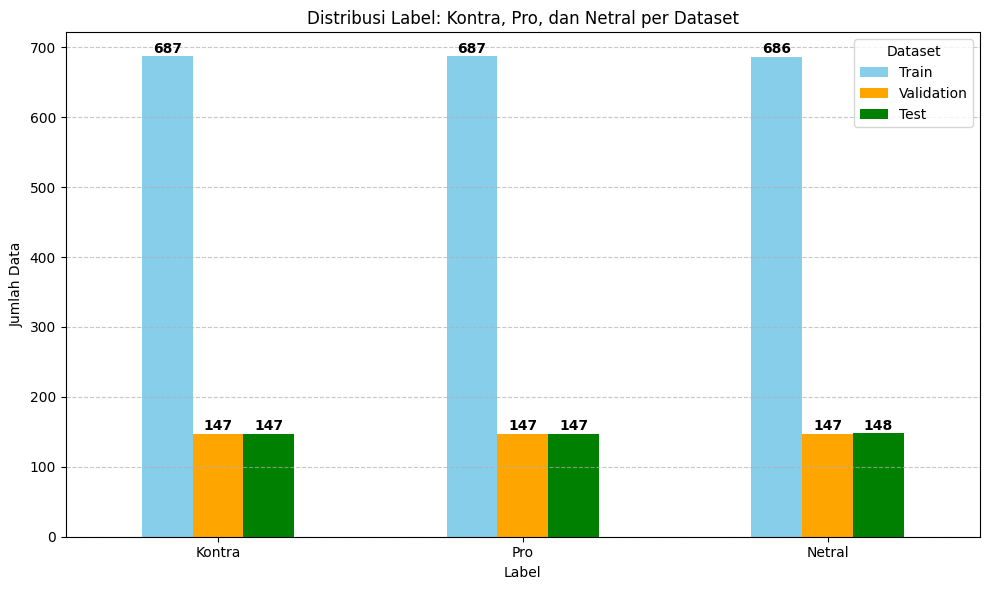

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah label di setiap set
train_counts = y_train_under.value_counts().sort_index()
val_counts = y_val_under.value_counts().sort_index()
test_counts = y_test_under.value_counts().sort_index()

# Gabungkan ke DataFrame
df_counts = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
})

# Mapping angka ke label teks
label_map = {0: 'Kontra', 1: 'Pro', 2: 'Netral'}
df_counts.index = df_counts.index.map(label_map)

# Plot
ax = df_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])

# Tambahkan jumlah di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 1,
            s=int(height),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

# Tambahkan judul dan label sumbu
plt.title("Distribusi Label: Kontra, Pro, dan Netral per Dataset")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.legend(title='Dataset')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


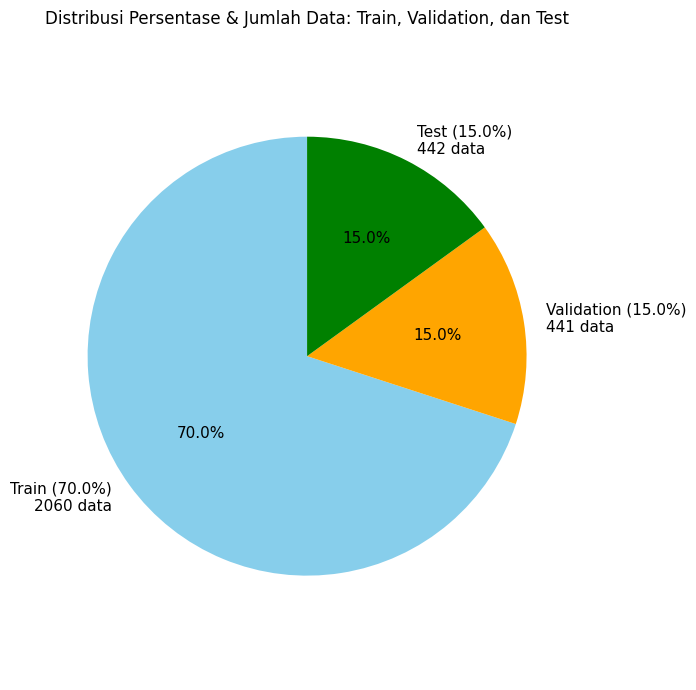

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data di setiap subset
train_size = len(y_train_under)
val_size = len(y_val_under)
test_size = len(y_test_under)

# Total data
total_size = train_size + val_size + test_size

# Hitung persentase
train_pct = train_size / total_size * 100
val_pct = val_size / total_size * 100
test_pct = test_size / total_size * 100

# Buat pie chart
sizes = [train_pct, val_pct, test_pct]
counts = [train_size, val_size, test_size]
labels = [
    f'Train ({train_pct:.1f}%)\n{train_size} data',
    f'Validation ({val_pct:.1f}%)\n{val_size} data',
    f'Test ({test_pct:.1f}%)\n{test_size} data'
]
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops=dict(color="black", fontsize=11)
)

plt.title('Distribusi Persentase & Jumlah Data: Train, Validation, dan Test')
plt.axis('equal')  # Agar bentuk lingkaran simetris
plt.tight_layout()
plt.show()


##Fitur Ekstraksi TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf_under = tfidf_vectorizer.fit_transform(X_train_under)
X_val_tfidf_under = tfidf_vectorizer.transform(X_val_under)
X_test_tfidf_under = tfidf_vectorizer.transform(X_test_under)

##Training dan Evaluasi SVM 70% Training, 15% Validasi, dan 15% Testing dengan Under Sampling

**Training**

In [ ]:
from sklearn.svm import SVC

# Inisialisasi dan latih model dengan kernel RBF
svm_3_label_undersampling = SVC(kernel='rbf', probability=True)  # probability=True diperlukan untuk ROC AUC
svm_3_label_undersampling.fit(X_train_tfidf_under, y_train_under)

SVC(probability=True)

**Validasi**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Prediksi validasi
y_val_pred_under = svm_3_label_undersampling.predict(X_val_tfidf_under)

print("=== Validation Metrics ===")
print("Accuracy : {:.4f}".format(accuracy_score(y_val_under, y_val_pred_under)))
print("F1 Score : {:.4f}".format(f1_score(y_val_under, y_val_pred_under, average='macro')))
print("Precision: {:.4f}".format(precision_score(y_val_under, y_val_pred_under, average='macro')))
print("Recall   : {:.4f}".format(recall_score(y_val_under, y_val_pred_under, average='macro')))
print("\nClassification Report:\n", classification_report(y_val_under, y_val_pred_under))


=== Validation Metrics ===
Accuracy : 0.7392
F1 Score : 0.7451
Precision: 0.7591
Recall   : 0.7392

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       147
           1       0.97      0.80      0.88       147
           2       0.65      0.69      0.67       147

    accuracy                           0.74       441
   macro avg       0.76      0.74      0.75       441
weighted avg       0.76      0.74      0.75       441



**Testing**

In [ ]:
# Prediksi test
y_test_pred_under = svm_3_label_undersampling.predict(X_test_tfidf_under)

print("=== Test Metrics ===")
print("Accuracy : {:.4f}".format(accuracy_score(y_test_under, y_test_pred_under)))
print("F1 Score : {:.4f}".format(f1_score(y_test_under, y_test_pred_under, average='macro')))
print("Precision: {:.4f}".format(precision_score(y_test_under, y_test_pred_under, average='macro')))
print("Recall   : {:.4f}".format(recall_score(y_test_under, y_test_pred_under, average='macro')))
print("\nClassification Report:\n", classification_report(y_test_under, y_test_pred_under))


=== Test Metrics ===
Accuracy : 0.7217
F1 Score : 0.7273
Precision: 0.7404
Recall   : 0.7218

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.68       147
           1       0.94      0.77      0.85       147
           2       0.64      0.68      0.66       148

    accuracy                           0.72       442
   macro avg       0.74      0.72      0.73       442
weighted avg       0.74      0.72      0.73       442



**Connfusion Matrix**

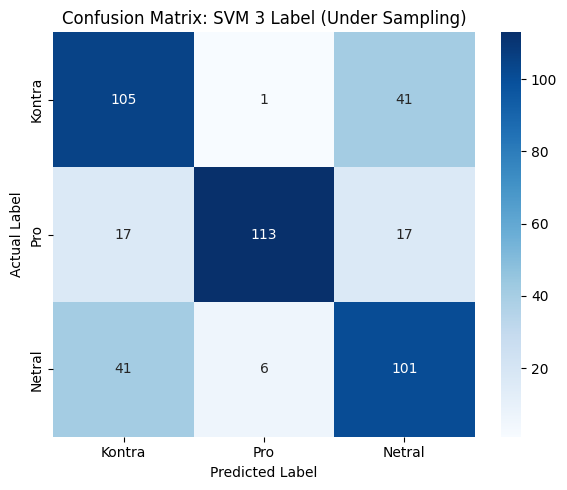

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prediksi
y_test_pred_under = svm_3_label_undersampling.predict(X_test_tfidf_under)

# Buat confusion matrix dengan urutan label sesuai: 0 = Kontra, 1 = Pro, 2 = Netral
cm = confusion_matrix(y_test_under, y_test_pred_under, labels=[0, 1, 2])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Kontra", "Pro", "Netral"],
            yticklabels=["Kontra", "Pro", "Netral"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix: SVM 3 Label (Under Sampling)")
plt.tight_layout()
plt.show()

**ROC AUC**

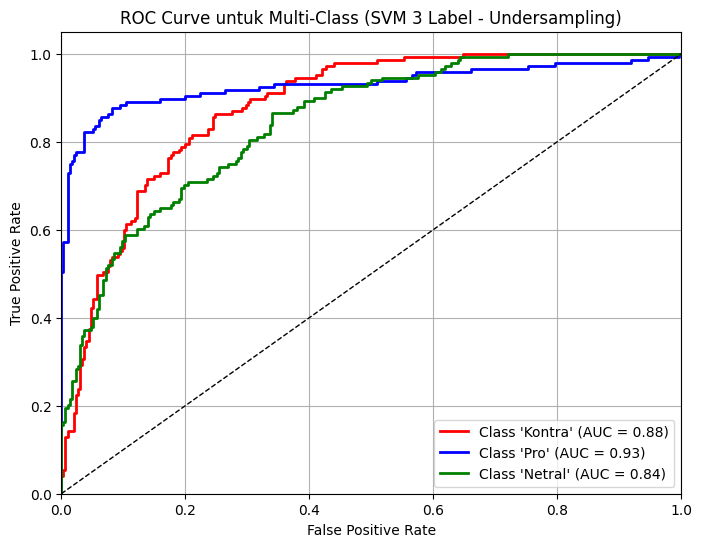


🎯 ROC AUC (macro): 0.8848


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# ==============================
# Binarisasi label
# ==============================
# Misal label: [pro, kontra, netral] → encode sebagai 0, 1, 2
classes_under = sorted(label3_svm_undersampling['label'].unique())  # urutan kelas alfabet
y_test_bin_under = label_binarize(y_test_under, classes=classes_under)
y_score_under = svm_3_label_undersampling.predict_proba(X_test_tfidf_under)

# ==============================
# ROC Curve dan AUC per kelas
# ==============================
fpr_under = dict()
tpr_under = dict()
roc_auc_under = dict()
n_classes_under = y_test_bin_under.shape[1]

for i in range(n_classes_under):
    fpr_under[i], tpr_under[i], _ = roc_curve(y_test_bin_under[:, i], y_score_under[:, i])
    roc_auc_under[i] = auc(fpr_under[i], tpr_under[i])

# ==============================
# Hitung Macro AUC
# ==============================
macro_roc_auc_under = np.mean(list(roc_auc_under.values()))

# ==============================
# Plot ROC Curve
# ==============================
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i, color in zip(range(n_classes_under), colors):
    if i == 0:
        label_name = 'Kontra'
    elif i == 1:
        label_name = 'Pro'
    elif i == 2:
        label_name = 'Netral'

    plt.plot(fpr_under[i], tpr_under[i], color=color, lw=2,
             label=f'Class \'{label_name}\' (AUC = {roc_auc_under[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class (SVM 3 Label - Undersampling)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"\n🎯 ROC AUC (macro): {macro_roc_auc_under:.4f}")


**Simpan Hasil Prediksi**

In [ ]:
import pandas as pd

# Reset index agar sejajar
y_test_under = y_test_under.reset_index(drop=True)
X_test_under = X_test_under.reset_index(drop=True)

# Buat Series dari hasil prediksi
y_test_pred_series_under = pd.Series(y_test_pred_under, index=y_test_under.index)

# Ambil kembali teks asli dan hasil stemming
original_texts_under = []
stemming_texts_under = []

for text in X_test_under:
    match = label3_svm_undersampling[label3_svm_undersampling['stemming'] == text]
    if not match.empty:
        original_texts_under.append(match.iloc[0]['text'])
        stemming_texts_under.append(match.iloc[0]['stemming'])
    else:
        original_texts_under.append("")
        stemming_texts_under.append(text)

# Susun DataFrame hasil
result_df_under = pd.DataFrame({
    'Text': original_texts_under,
    'Stemming': stemming_texts_under,
    'True Label': y_test_under,
    'Predicted Label': y_test_pred_series_under
})

# Tambahkan kolom Correct (True jika benar, False jika salah)
result_df_under['Correct'] = result_df_under['True Label'] == result_df_under['Predicted Label']

# Urutkan: salah prediksi di atas (Correct = False)
result_df_under = result_df_under.sort_values(by='Correct', ascending=True).reset_index(drop=True)

# Simpan ke file CSV
result_df_under.to_csv('hasil_prediksi_label3_svm_undersampling_danantara.csv', index=False)
